In [1]:
import pandas as pd
import numpy as np
import tejapi
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
tejapi.ApiConfig.api_key = "Your Key"
tejapi.ApiConfig.ignoretz = True

In [2]:
taipower_index = tejapi.get('GLOBAL/WTPC',
                           paginate = True,
                           chinese_column_name = True)

In [3]:
taipower_index

,產業碼,日期,收盤,產業名稱
None,,,,
0,TAIP001,2020-01-01,134.996,EMS
1,TAIP001,2020-01-02,134.378,EMS
2,TAIP001,2020-01-03,133.755,EMS
3,TAIP001,2020-01-04,133.127,EMS
4,TAIP001,2020-01-05,132.495,EMS
...,...,...,...,...
18715,TAIP032,2021-08-04,125.829,觸控及其他面板
18716,TAIP032,2021-08-05,128.932,觸控及其他面板
18717,TAIP032,2021-08-06,125.702,觸控及其他面板


In [4]:
taipower_index['產業名稱'].unique()

array(['EMS', 'IC封測', 'IC設計', 'LCD 面板', 'LED', 'PCB', 'PCB材料', 'PC系統',
       'PC週邊', '二極體及石英元件', '太陽能', '主機板', '主機板及工業電腦', '半導體', '光元件模組',
       '光電/ IO', '光學鏡頭', '沖壓及散熱元件', '其他半導體', '背光模組及其他原料', '消費性電子', '記憶體',
       '被動元件', '通訊設備', '連接器', '晶圓代工', '電子設備', '電子零組件', '電源供應器', '電機設備',
       '機殼', '觸控及其他面板'], dtype=object)

In [5]:
index = taipower_index[taipower_index['產業名稱'] == '半導體']
index

,產業碼,日期,收盤,產業名稱
None,,,,
7618,TAIP014,2020-01-01,121.850,半導體
7619,TAIP014,2020-01-02,120.910,半導體
7620,TAIP014,2020-01-03,119.981,半導體
7621,TAIP014,2020-01-04,120.425,半導體
7622,TAIP014,2020-01-05,121.551,半導體
...,...,...,...,...
8199,TAIP014,2021-08-04,194.830,半導體
8200,TAIP014,2021-08-05,195.829,半導體
8201,TAIP014,2021-08-06,197.758,半導體


In [7]:
index_month = index.resample('MS', on = '日期').first().reset_index(drop = True)
index_month

,產業碼,日期,收盤,產業名稱
0,TAIP014,2020-01-01,121.850,半導體
1,TAIP014,2020-02-01,124.514,半導體
2,TAIP014,2020-03-01,137.642,半導體
3,TAIP014,2020-04-01,108.639,半導體
4,TAIP014,2020-05-01,133.510,半導體
...,...,...,...,...
15,TAIP014,2021-04-01,140.514,半導體
16,TAIP014,2021-05-01,189.581,半導體
17,TAIP014,2021-06-01,180.481,半導體
18,TAIP014,2021-07-01,208.841,半導體


In [8]:
semi = tejapi.get('TWN/EWISAMPLE',
                 idx_id = 'IX0028',
                 paginate = True,
                 chinese_column_name = True)
semi

,指數碼,證券碼,納入日,剔除日,目前狀態
None,,,,,
0,IX0028,1437,2007-07-02,2018-07-01,2021-01-01
1,IX0028,2302,2007-07-02,2007-11-28,2021-01-01
2,IX0028,2302,2008-02-01,2008-09-12,2021-01-01
3,IX0028,2302,2008-12-01,2009-10-02,2021-01-01
4,IX0028,2302,2009-12-01,NaT,2021-01-01
...,...,...,...,...,...
136,IX0028,8150,2018-12-01,NaT,2021-01-01
137,IX0028,8261,2009-12-11,2015-08-28,2021-01-01
138,IX0028,8261,2015-11-01,NaT,2021-01-01


In [9]:
#提除日為NaT，代表其還在半導體指數內
semi_list = semi[semi['剔除日'].isnull() == True]['證券碼'].tolist()
semi_list

['2302',
 '2303',
 '2329',
 '2330',
 '2337',
 '2338',
 '2342',
 '2344',
 '2351',
 '2363',
 '2369',
 '2379',
 '2388',
 '2401',
 '2408',
 '2434',
 '2436',
 '2441',
 '2449',
 '2451',
 '2454',
 '2458',
 '2481',
 '3006',
 '3014',
 '3016',
 '3034',
 '3035',
 '3041',
 '3054',
 '3094',
 '3189',
 '3257',
 '3413',
 '3443',
 '3530',
 '3532',
 '3545',
 '3583',
 '3588',
 '3661',
 '3686',
 '3711',
 '4919',
 '4952',
 '4961',
 '4967',
 '4968',
 '5269',
 '5285',
 '5471',
 '6202',
 '6239',
 '6243',
 '6257',
 '6271',
 '6415',
 '6451',
 '6515',
 '6525',
 '6531',
 '6533',
 '6552',
 '6573',
 '6756',
 '8016',
 '8028',
 '8081',
 '8110',
 '8131',
 '8150',
 '8261',
 '8271']

In [10]:
#取出2020-01-01~被納入的股票，並排除 (我們只要完整存在於這段期間的股票)
exclude = semi[(semi['納入日'] > '2020-01-01')]['證券碼'].unique().tolist()
exclude

['2434', '3041', '3545', '3686', '6271', '6515', '6552', '6756']

In [11]:
semi_list = list(set(semi_list) - set(exclude))
semi_list

['4952',
 '3583',
 '3661',
 '6573',
 '2401',
 '2344',
 '6531',
 '2303',
 '2441',
 '3530',
 '2449',
 '2481',
 '3035',
 '3443',
 '3094',
 '8081',
 '3014',
 '3054',
 '6415',
 '2342',
 '3016',
 '5269',
 '8150',
 '2436',
 '2330',
 '2454',
 '3532',
 '3006',
 '8110',
 '2369',
 '5285',
 '2338',
 '6257',
 '8271',
 '2451',
 '6239',
 '3257',
 '6451',
 '3413',
 '2363',
 '8261',
 '6202',
 '6525',
 '6243',
 '2302',
 '2351',
 '8028',
 '5471',
 '2388',
 '2458',
 '4919',
 '2337',
 '2408',
 '3034',
 '3588',
 '8131',
 '4961',
 '8016',
 '3711',
 '6533',
 '4967',
 '4968',
 '2379',
 '2329',
 '3189']

In [12]:
earning = pd.DataFrame()
for coid in semi_list:
    earning = earning.append(tejapi.get('TWN/ASALE',
                                       coid = coid,
                                       mdate = {'gte':'2020-01-01', 'lte':'2021-06-30'},
                                       opts = {'columns':['coid','mdate','d0001']},
                                       paginate = True,
                                       chinese_column_name = True))
earning

,公司,年月,單月營收(千元)
None,,,
0,4952,2020-01-01,120247
1,4952,2020-02-01,150392
2,4952,2020-03-01,201243
3,4952,2020-04-01,230654
4,4952,2020-05-01,250885
...,...,...,...
13,3189,2021-02-01,2032859
14,3189,2021-03-01,2680316
15,3189,2021-04-01,2732110


In [13]:
semi_earning = earning.groupby(by = '年月')['單月營收(千元)'].sum().reset_index()
semi_earning

,年月,單月營收(千元)
0,2020-01-01,225633182
1,2020-02-01,209365082
2,2020-03-01,254537827
3,2020-04-01,231897060
4,2020-05-01,229823780
...,...,...
13,2021-02-01,263634611
14,2021-03-01,315625014
15,2021-04-01,296903906
16,2021-05-01,307036420


In [14]:
semi_earning = semi_earning.rename(columns = {'年月':'日期'})
semi_earning

,日期,單月營收(千元)
0,2020-01-01,225633182
1,2020-02-01,209365082
2,2020-03-01,254537827
3,2020-04-01,231897060
4,2020-05-01,229823780
...,...,...
13,2021-02-01,263634611
14,2021-03-01,315625014
15,2021-04-01,296903906
16,2021-05-01,307036420


In [15]:
#合併資料
merge_data = index_month.merge(semi_earning, on = '日期')
merge_data

,產業碼,日期,收盤,產業名稱,單月營收(千元)
0,TAIP014,2020-01-01,121.850,半導體,225633182
1,TAIP014,2020-02-01,124.514,半導體,209365082
2,TAIP014,2020-03-01,137.642,半導體,254537827
3,TAIP014,2020-04-01,108.639,半導體,231897060
4,TAIP014,2020-05-01,133.510,半導體,229823780
...,...,...,...,...,...
13,TAIP014,2021-02-01,157.896,半導體,263634611
14,TAIP014,2021-03-01,163.524,半導體,315625014
15,TAIP014,2021-04-01,140.514,半導體,296903906
16,TAIP014,2021-05-01,189.581,半導體,307036420


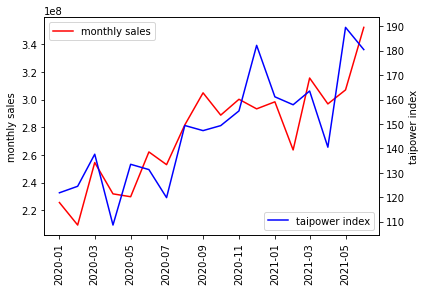

In [16]:
#視覺化，可看到預測效果強烈
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()
ax1.plot(merge_data['日期'],merge_data['單月營收(千元)'], color = 'r', label = 'monthly sales')
ax2.plot(merge_data['日期'],merge_data['收盤'], color = 'b', label = 'taipower index')
ax1.legend(loc=0)
ax2.legend(loc=4)

ax1.set_ylabel('monthly sales')
ax2.set_ylabel('taipower index')
#plt.gca()函式獲得當前坐標軸，然後才能設定引數或作圖，fig.plot()內部實現了這一步驟
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  #設定x軸主刻度顯示格式（日期）
ax1.xaxis.set_tick_params(rotation=90)

plt.show()


In [17]:
x = merge_data['收盤'].values.reshape(-1,1)
y = merge_data['單月營收(千元)'].values.reshape(-1,1)
x_intercept = sm.add_constant(x)
x_intercept

array([[  1.   , 121.85 ],
       [  1.   , 124.514],
       [  1.   , 137.642],
       [  1.   , 108.639],
       [  1.   , 133.51 ],
       [  1.   , 131.347],
       [  1.   , 119.86 ],
       [  1.   , 149.401],
       [  1.   , 147.305],
       [  1.   , 149.352],
       [  1.   , 155.378],
       [  1.   , 182.221],
       [  1.   , 161.142],
       [  1.   , 157.896],
       [  1.   , 163.524],
       [  1.   , 140.514],
       [  1.   , 189.581],
       [  1.   , 180.481]])

In [18]:
#模型
model = sm.OLS(y, x_intercept)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     29.43
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           5.62e-05
Time:                        08:47:46   Log-Likelihood:                -329.43
No. Observations:                  18   AIC:                             662.9
Df Residuals:                      16   BIC:                             664.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.118e+07   3.63e+07      2.235      0.0

C:\Users\a0927\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
